In [389]:
# Import relevant modules
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [390]:
# Testing conversion from text file to csv
column_list = ['Year', 'Female', 'Male', 'Total']
#sep='/s+'
read_file = pd.read_csv('births/Births/DEUTW.Births.txt', skiprows=3, index_col=False, delim_whitespace=True, header = None, names = column_list )
#read_file.columns = ['Year', 'Female', 'Male', 'Total']
read_file.to_csv('births/BirthsCSV/DEUTW.Births.csv', index = None)

In [391]:
read_file


,Year,Female,Male,Total
0,1946,352589,380409,732998
1,1947,376662,404759,781421
2,1948,387457,418617,806074
3,1949,401389,431414,832803
4,1950,391891,420944,812835
...,...,...,...,...
70,2016,313357,328805,642162
71,2017,311041,327463,638504
72,2018,313436,330234,643670
73,2019,310948,327924,638872


In [392]:
# Convert all files in a directory from txt to csv for Births
path = "births/Births/*.txt"

for fname in glob.glob(path):
    column_list = ['Year', 'Female', 'Male', 'Total']
    read_file = pd.read_csv(fname, skiprows=3, index_col=False, delim_whitespace=True, header = None, names = column_list )
    read_file.to_csv(f'births/BirthsCSV/{fname[14:17]}.Births.csv', index = None)
    

In [393]:
# Convert exposures directory to csv file
path2 = "exposures/Exposures_1x1/*.txt"
for fname in glob.glob(path2):
    column_list2 = ['Year','Age', 'Female', 'Male', 'Total']
    read_file = pd.read_csv(fname, skiprows=3, index_col=False, delim_whitespace=True, header = None, names = column_list2 )
    read_file.to_csv(f'exposures/Exposures_1x1CSV/{fname[24:27]}.expos.csv', index = None)

In [394]:
# Create Dataframe for births
GBR = pd.read_csv('births/BirthsCSV/GBR.Births.csv')
USA = pd.read_csv('births/BirthsCSV/USA.Births.csv')
RUS = pd.read_csv('births/BirthsCSV/RUS.Births.csv')
ITA = pd.read_csv('births/BirthsCSV/ITA.Births.csv')
FRA = pd.read_csv('births/BirthsCSV/FRA.Births.csv')
EGER = pd.read_csv('births/BirthsCSV/DEUTE.Births.csv')
WGER = pd.read_csv('births/BirthsCSV/DEUTW.Births.csv')
CAN = pd.read_csv('births/BirthsCSV/CAN.Births.csv')

DNK = pd.read_csv('births/BirthsCSV/DNK.Births.csv')
FIN = pd.read_csv('births/BirthsCSV/FIN.Births.csv')
NOR = pd.read_csv('births/BirthsCSV/NOR.Births.csv')
SWE = pd.read_csv('births/BirthsCSV/SWE.Births.csv')



In [395]:
# Create Dataframe for exposures
eDNK = pd.read_csv('exposures/Exposures_1x1CSV/DNK.expos.csv')
eFIN = pd.read_csv('exposures/Exposures_1x1CSV/FIN.expos.csv')
eNOR = pd.read_csv('exposures/Exposures_1x1CSV/NOR.expos.csv')
eSWE = pd.read_csv('exposures/Exposures_1x1CSV/SWE.expos.csv')

eDNK.rename(columns = {'Total':'Exposure'}, inplace = True)
eFIN.rename(columns = {'Total':'Exposure'}, inplace = True)
eNOR.rename(columns = {'Total':'Exposure'}, inplace = True)
eSWE.rename(columns = {'Total':'Exposure'}, inplace = True)

eDNK1 = eDNK.loc[eDNK['Age'] == '0', ['Year','Exposure']]
eFIN1 = eFIN.loc[eFIN['Age'] == '0', ['Year','Exposure']]
eNOR1 = eNOR.loc[eNOR['Age'] == '0', ['Year','Exposure']]
eSWE1 = eSWE.loc[eSWE['Age'] == '0', ['Year','Exposure']]

In [396]:
# e1 = pd.merge(eDNK1, eFIN1, how='outer')
# e2 = pd.merge(e1, eNOR1, how='outer')
# e3 = pd.merge(e2, eSWE1, how='outer')
eDNK1.loc[eDNK1['Year']==1980, :]

,Year,Exposure
16095,1980,58286.08


In [397]:
# Create new column for country
DNK['Country'] = 'Denmark'
FIN['Country'] = 'Finland'
NOR['Country'] = 'Norway'
SWE['Country'] = 'Sweden'

# Only look data from 1980
DNK1 = DNK.loc[DNK['Year']>1979, :]
NOR1 = NOR.loc[NOR['Year']>1979, :]
SWE1 = SWE.loc[SWE['Year']>1979, :]
FIN1 = FIN.loc[FIN['Year']>1979, :]

In [398]:
#Merge each country exposure risk with birth table individually
ebDEN = pd.merge(DNK1, eDNK1, on='Year', how='outer')
ebFIN = pd.merge(FIN1, eFIN1, on='Year', how='outer')
ebNOR = pd.merge(NOR1, eNOR1, on='Year', how='outer')
ebSWE = pd.merge(SWE1, eSWE1, on='Year', how='outer')
ebSWE

,Year,Female,Male,Total,Country,Exposure
0,1980,47204.0,49860.0,97064.0,Sweden,96833.92
1,1981,45934.0,48131.0,94065.0,Sweden,95170.78
2,1982,45016.0,47732.0,92748.0,Sweden,93363.10
3,1983,44467.0,47313.0,91780.0,Sweden,92117.75
4,1984,45549.0,48340.0,93889.0,Sweden,92576.69
...,...,...,...,...,...,...
267,1975,NaN,NaN,NaN,NaN,106931.83
268,1976,NaN,NaN,NaN,NaN,100286.45
269,1977,NaN,NaN,NaN,NaN,97133.13
270,1978,NaN,NaN,NaN,NaN,94346.25


In [399]:
# Finally merge all countries together onto one spreadsheet

test1 = pd.merge(ebDEN, ebFIN, how='outer')
test2 = pd.merge(test1, ebNOR, how='outer')
df = pd.merge(test2, ebSWE, how='outer')

In [400]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 781 entries, 0 to 780
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      781 non-null    int64  
 1   Female    171 non-null    float64
 2   Male      171 non-null    float64
 3   Total     171 non-null    float64
 4   Country   171 non-null    object 
 5   Exposure  781 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 42.7+ KB


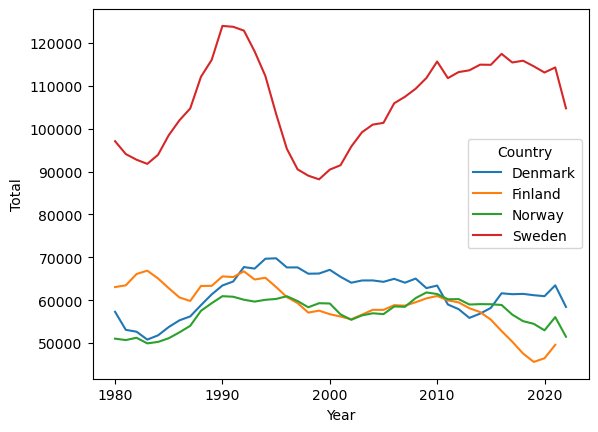

In [401]:
# 
sns.lineplot(data=df, x='Year', y='Total', hue='Country')
plt.show()

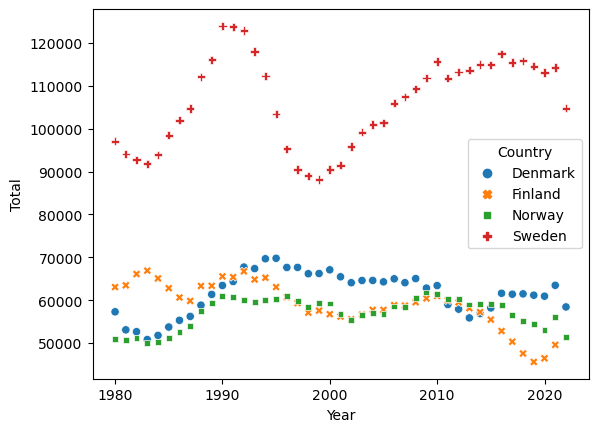

In [402]:
# Looking at Births
sns.scatterplot(data=df, x='Year', y='Total', hue='Country', style='Country')
plt.show()

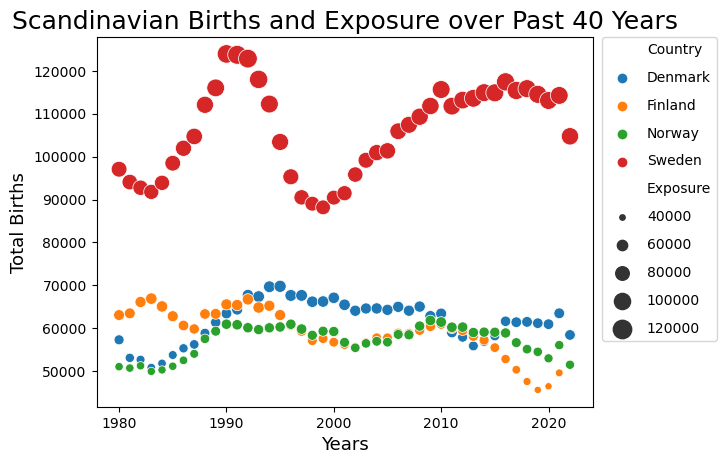

In [403]:
# Plot on scatterplot with exposure and births
figure = sns.scatterplot(data=df, x='Year', y='Total', hue='Country', size='Exposure', sizes=(5, 200))
plt.xlabel('Years', fontsize = 13)
plt.ylabel('Total Births', fontsize = 13)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, labelspacing = 1)  # place legend outside top right corner of plot
plt.title('Scandinavian Births and Exposure over Past 40 Years', fontsize = 18)
plt.show()

In [404]:
# DNK.rename(columns = {'dnkTotal':'Total'}, inplace = True)
# FIN.rename(columns = {'finTotal':'Total'}, inplace = True)
# NOR.rename(columns = {'norTotal':'Total'}, inplace = True)
# SWE.rename(columns = {'sweTotal':'Total'}, inplace = True)

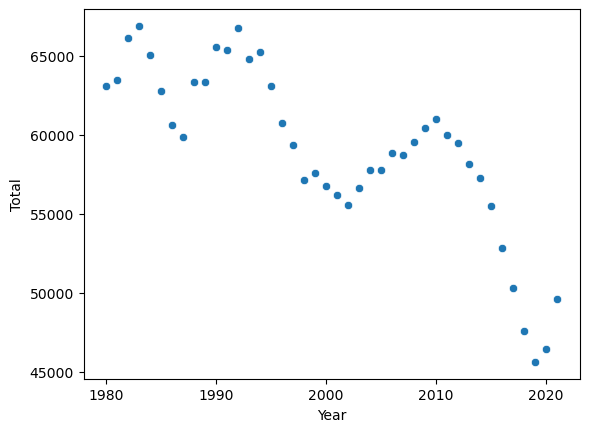

In [405]:
sns.scatterplot(data=FIN1, x='Year', y='Total')
plt.show()

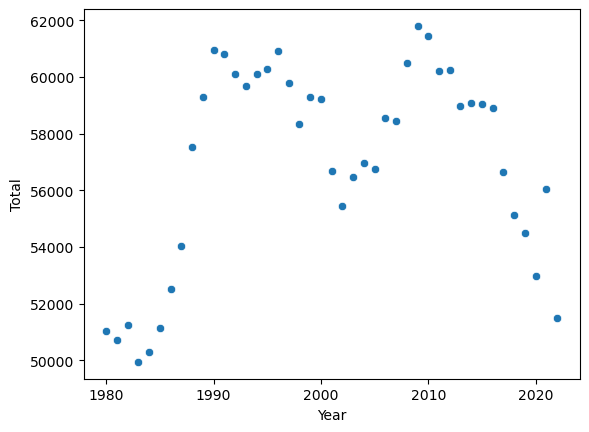

In [406]:
sns.scatterplot(data=NOR1, x='Year', y='Total')
#plt.ylim(50000, 1100000)
plt.show()

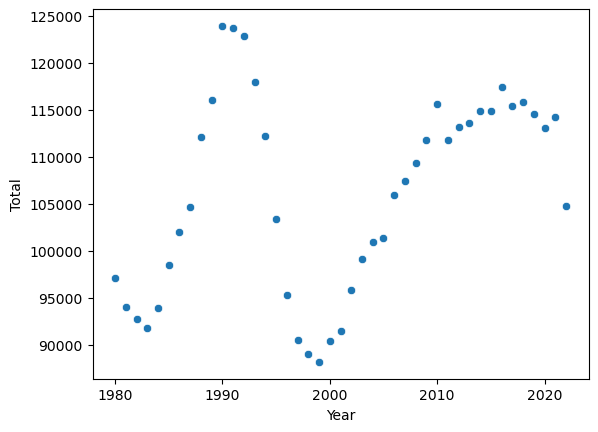

In [407]:
sns.scatterplot(data=SWE1, x='Year', y='Total')
plt.show()

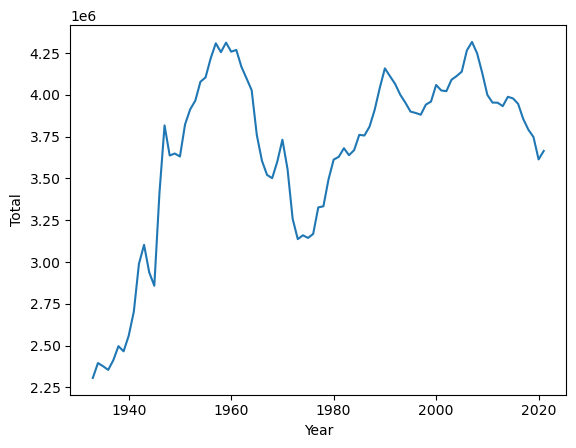

In [408]:
res = sns.lineplot(x="Year", y="Total", data=USA)
plt.show()

In [409]:
#c_death_rates
# path = "c_death_rates/cMx_1x1/*.txt"
# for fname in glob.glob(path):
#     column_list = ['Year', 'Female', 'Male', 'Total']
#     read_file = pd.read_csv(fname, skiprows=3, index_col=False, delim_whitespace=True, header = None, names = column_list )
#     read_file.to_csv(f'births/BirthsCSV/{fname[14:17]}.Births.csv', index = None)

# path = "c_death_rates/cMx_1x5/*.txt"
# for fname in glob.glob(path):
#     column_list = ['Year', 'Female', 'Male', 'Total']
#     read_file = pd.read_csv(fname, skiprows=3, index_col=False, delim_whitespace=True, header = None, names = column_list )
#     read_file.to_csv(f'births/BirthsCSV/{fname[14:17]}.Births.csv', index = None)

# path = "c_death_rates/cMx_1x10/*.txt"
# for fname in glob.glob(path):
#     column_list = ['Year', 'Female', 'Male', 'Total']
#     read_file = pd.read_csv(fname, skiprows=3, index_col=False, delim_whitespace=True, header = None, names = column_list )
#     read_file.to_csv(f'births/BirthsCSV/{fname[14:17]}.Births.csv', index = None)

# path = "c_death_rates/cMx_5x1/*.txt"
# for fname in glob.glob(path):
#     column_list = ['Year', 'Female', 'Male', 'Total']
#     read_file = pd.read_csv(fname, skiprows=3, index_col=False, delim_whitespace=True, header = None, names = column_list )
#     read_file.to_csv(f'births/BirthsCSV/{fname[14:17]}.Births.csv', index = None)

# path = "c_death_rates/cMx_5x5/*.txt"
# for fname in glob.glob(path):
#     column_list = ['Year', 'Female', 'Male', 'Total']
#     read_file = pd.read_csv(fname, skiprows=3, index_col=False, delim_whitespace=True, header = None, names = column_list )
#     read_file.to_csv(f'births/BirthsCSV/{fname[14:17]}.Births.csv', index = None)

# path = "c_death_rates/cMx_5x10/*.txt"
# for fname in glob.glob(path):
#     column_list = ['Year', 'Female', 'Male', 'Total']
#     read_file = pd.read_csv(fname, skiprows=3, index_col=False, delim_whitespace=True, header = None, names = column_list )
#     read_file.to_csv(f'births/BirthsCSV/{fname[14:17]}.Births.csv', index = None)
    